# Random Forest Regressor

In [130]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import time
import datetime
from scipy import stats

In [131]:
df = pd.read_csv(r'C:/Users/aldoi/Desktop/Università di Pisa/Big Data/GooglePlayProg/CSV/data_cleaned.csv')

In [132]:
df.drop('App', inplace=True, axis=1)

Categorical LabelEncoding & 'LastUpdated' transforming

In [133]:
categorical_attrs = [ 'Installs','Content Rating', 'Current Ver', 'Android Ver', 'Main_Genres','Secondary_Genres', 'Compatibility']
numerical_attrs = ['Reviews', 'Size', 'Price']
df[categorical_attrs] = df[categorical_attrs].apply(LabelEncoder().fit_transform)
df['YearUpdated'], df['MonthUpdated'] = pd.to_datetime(df['Last Updated']).dt.year, pd.to_datetime(df['Last Updated']).dt.month

In [134]:
df.drop('Last Updated', inplace=True, axis=1)
df.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game,Compatibility,RTR,Both_Stores,YearUpdated,MonthUpdated
0,4.7,11661,4.0,6,0.00,1,278,14,17,5,0,0,2,0.002914,0,2018,7
1,4.0,19,3.2,4,0.00,1,104,17,42,5,0,0,2,0.000473,0,2017,10
2,4.6,22098,18.0,6,0.00,1,1853,14,39,5,0,0,2,0.005523,0,2018,7
3,3.8,718,26.0,4,399.99,1,108,19,24,5,0,0,2,0.017948,0,2018,3
4,4.4,190,34.0,4,0.00,1,1551,9,12,5,0,0,2,0.004748,0,2017,11


Dataset Splitting

In [135]:
class_name='Rating'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

In [136]:
mse=make_scorer(mean_squared_error,greater_is_better=False)

Setting the GridSearch parameters

In [137]:
param_grid = {"n_estimators": [500,700],
              "max_depth": [6,8,10],
              "criterion":['mse', 'mae']
              }

# run grid search
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, n_jobs=-1, cv = 5, scoring = mse)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_d

Best estimator of RFR

In [138]:
Randr = grid.best_estimator_
Randr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [139]:
Randr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Evaluation of training performance

In [140]:
y_pred = Randr.predict(X_train)
print('Mean Absolute Error %s' %
      metrics.mean_absolute_error(y_train, y_pred))
print ('Mean Squared Error %s' %
      mean_squared_error(y_train,y_pred))

Pearson, p_value = stats.pearsonr(y_train, y_pred)
KStest, p_value = stats.ks_2samp(y_train,y_pred) 
print('Pearson:', round(Pearson,3))
print('KS test:', round(KStest,3))

Mean Absolute Error 0.29245796737781704
Mean Squared Error 0.1705075423744424
Pearson: 0.673
KS test: 0.255


Evaluating of test performance

In [141]:
y_pred = Randr.predict(X_test)
print('Mean Absolute Error %s' %
      metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error %s' %
      mean_squared_error(y_test,y_pred))
Pearson, p_value = stats.pearsonr(y_test, y_pred)
KStest, p_value = stats.ks_2samp(y_test,y_pred) 
print('Pearson:', round(Pearson,3))
print('KS test:', round(KStest,3))

Mean Absolute Error 0.33805676125878303
Mean Squared Error 0.24348070493305188
Pearson: 0.435
KS test: 0.284


Bar chart of Top 10 Important Features

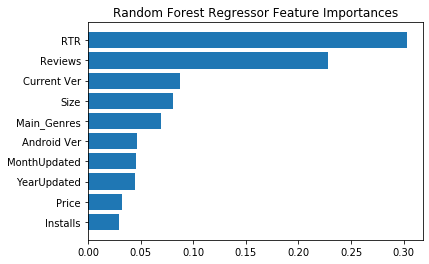

In [142]:
nbr_features = 10
feature_importances = Randr.feature_importances_
sorted_idx = feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes)[sorted_idx])
plt.title("Random Forest Regressor Feature Importances")
plt.show()

In [143]:
feature_importances

array([0.22843046, 0.0809656 , 0.02955079, 0.03207279, 0.011957  ,
       0.08783486, 0.04666244, 0.06953916, 0.00363959, 0.00868944,
       0.00162201, 0.00490732, 0.30300899, 0.00109496, 0.04459337,
       0.04543123])

In [144]:
for i in range(len(feature_importances)):
    print('Feature %d: %f' % (i, feature_importances[i]))

Feature 0: 0.228430
Feature 1: 0.080966
Feature 2: 0.029551
Feature 3: 0.032073
Feature 4: 0.011957
Feature 5: 0.087835
Feature 6: 0.046662
Feature 7: 0.069539
Feature 8: 0.003640
Feature 9: 0.008689
Feature 10: 0.001622
Feature 11: 0.004907
Feature 12: 0.303009
Feature 13: 0.001095
Feature 14: 0.044593
Feature 15: 0.045431


Plotting of prediction model

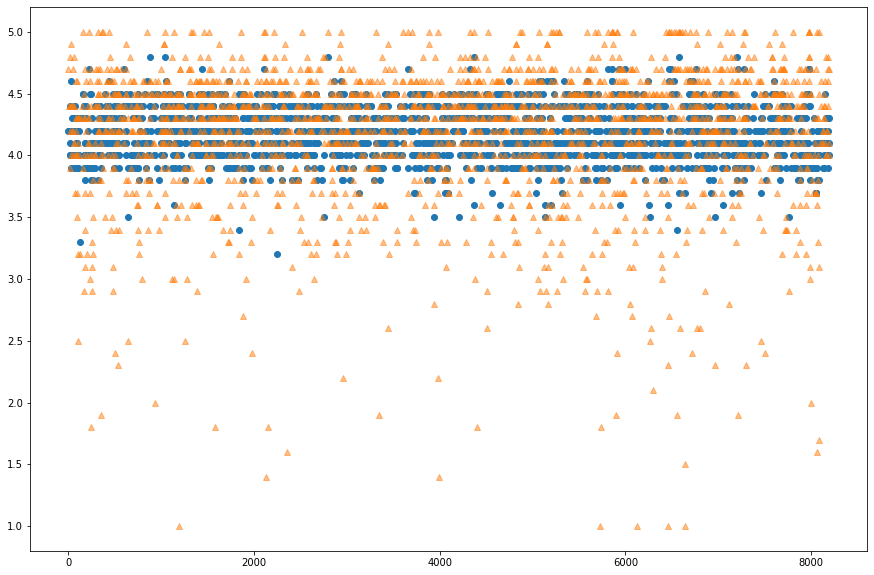

In [145]:
pred_df = pd.DataFrame(data = {"Predicted": np.around(y_pred, decimals=1), "Actual": y_test})
plt.figure(figsize=(15,10))
plt.plot(pred_df["Predicted"][:], "o")
plt.plot(pred_df['Actual'][:], "^", alpha=0.50)
plt.show()

In [146]:
import plotly.express as px
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()